## Nothing at stake scenarios

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

In [181]:
def PoS(alpha, pLambda):
    chain_summary = []
    chain_lens = []
    max_chain_lens = []
    chain = np.array([1])
    new_chain = np.array([])
    for i in range(100):
        children  = np.random.poisson(pLambda, chain.shape[0])
#         print  "\n", children, chain ,"\t",
        new_chain = np.array([])
        longest_chain_len = np.max(chain)
        max_chain_lens += [np.where(chain==longest_chain_len)[0].shape[0]]
        chain_lens += [chain.shape[0]]
        for j, parent in enumerate(chain):
            if children[j] == 0:
                new_chain = np.append(new_chain, chain[j])
            elif chain[j] == longest_chain_len:
                Z = np.ones(children[j])*(chain[j]+1)
                new_chain = np.append(new_chain, Z)
            else:
                extend = np.random.binomial(n=children[j], p=alpha)
                Z = np.ones(extend)*(chain[j]+1)
                new_chain = np.append(new_chain, Z)
                Z = np.ones(children[j]-extend)*(chain[j])
                new_chain = np.append(new_chain, Z)
        chain = new_chain
        chain_summary += [list(chain)]
    chain_summary = np.array(chain_summary)
    plt.figure(figsize=(20,10))
    plt.plot(max_chain_lens, label="Number of longest chains")
    plt.plot(chain_lens,alpha=.5, label="Number of chains")
    plt.xlabel("Rounds")
    plt.ylabel("Number of longest chains")
    plt.title("Lambda= "+str(pLambda)+ " and alpha = "+str(alpha))
    plt.ylim(0,20)
    plt.legend()
    plt.show()
    return chain_summary

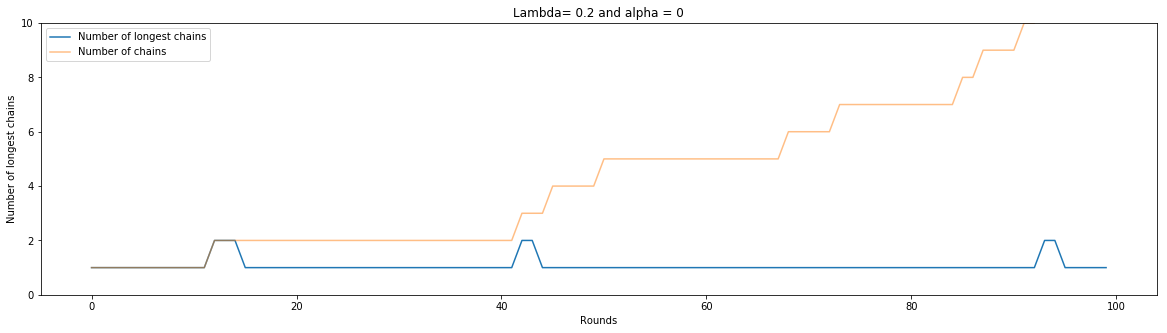

In [173]:
pLambda = 0.2
alpha = 0
chain_summary = PoS(alpha=0, pLambda=pLambda)

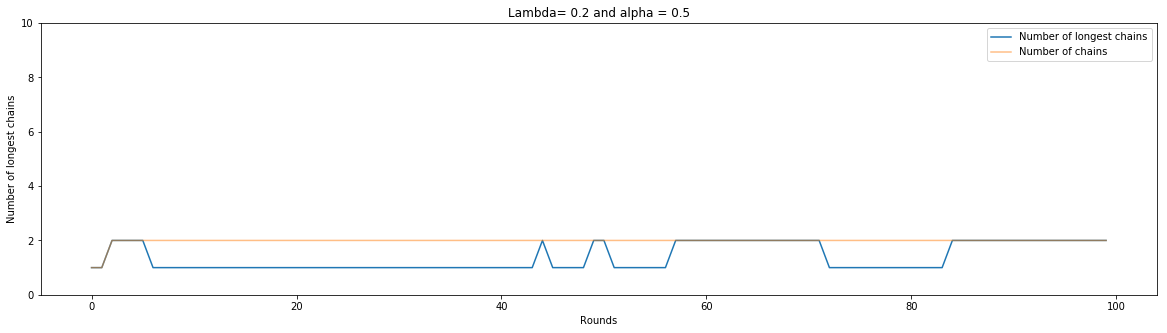

In [174]:
pLambda = 0.2
alpha = .5
chain_summary = PoS(alpha=alpha, pLambda=pLambda)

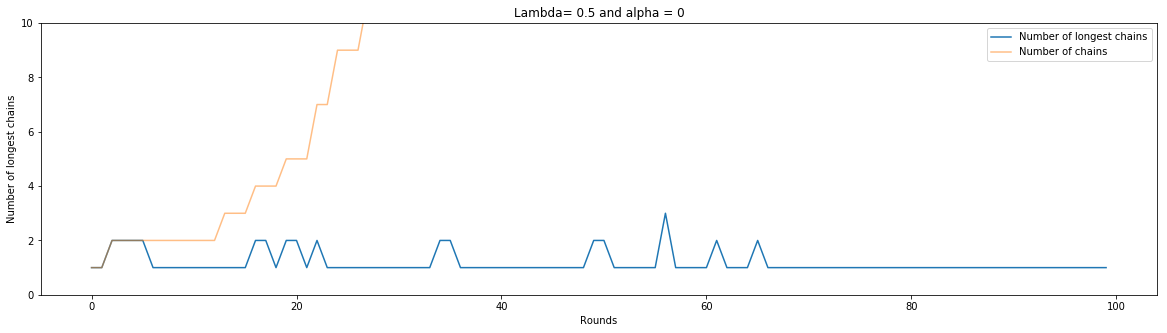

In [175]:
pLambda = 0.5
alpha = 0
chain_summary = PoS(alpha=alpha, pLambda=pLambda)

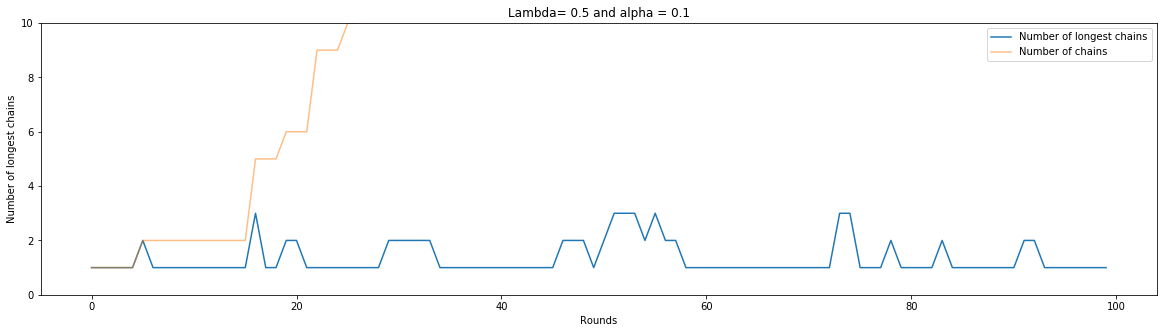

In [176]:
pLambda = 0.5
alpha = 0.1
chain_summary = PoS(alpha=alpha, pLambda=pLambda)


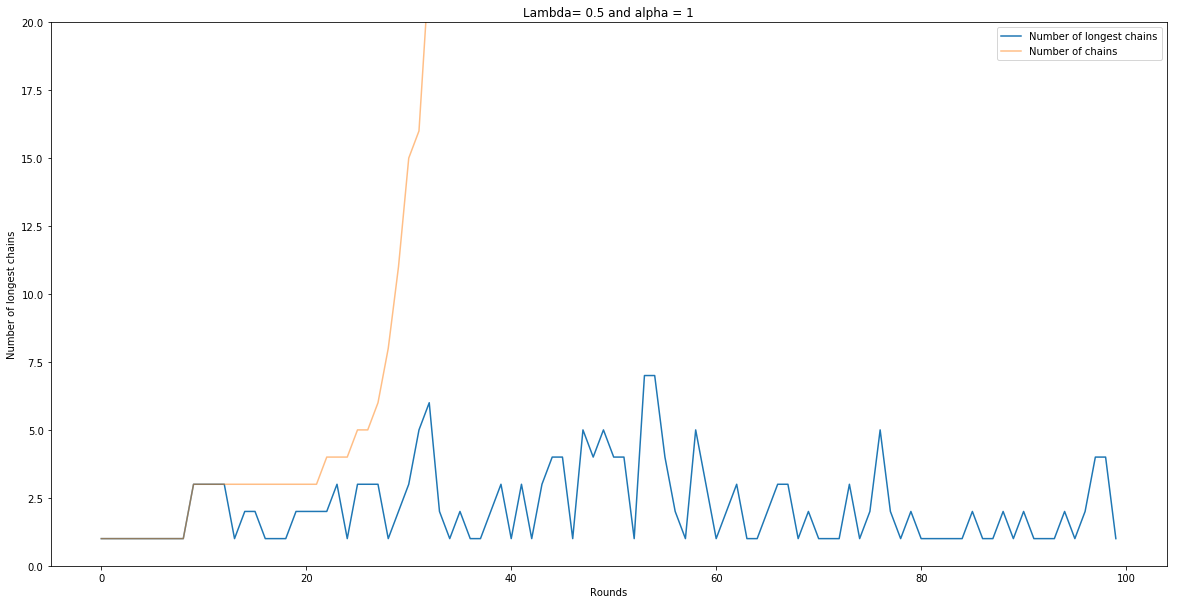

In [183]:
pLambda = 0.5
alpha = 1
chain_summary = PoS(alpha=alpha, pLambda=pLambda)
